# Kql Magic Demo
1. press F11 for browser full screen  
2. select 'Single-Document Mode' and 'Presentation Mode' in View tab (Ctrl + Shift + D)  
3. select 'Restart Kernel and Clear All Outputs...' in Kernel tab  
4. repeat: press Shift+Enter to run selected cells

![alt text](images/Kusto.jpg "Kusto Magic")

### List current defined Magics
*%kql and %%kql should not be listed*

In [ ]:
%lsmagic

### Load KqlMagic 

*current load is from source code folder*  
*once KqlMagic will be public, will load from known repository *

  Cloning git://github.com/mbnshtck/jupyter-kql-magic.git to c:\users\michabin\appdata\local\temp\pip-req-build-wm6hgxcp
  Running setup.py bdist_wheel for kqlmagic: started
  Running setup.py bdist_wheel for kqlmagic: finished with status 'done'
  Stored in directory: C:\Users\michabin\AppData\Local\Temp\pip-ephem-wheel-cache-5t4hjdps\wheels\e8\47\c6\64f4ee9f215f0e7296eca5b3fdad33ca6c3935c64aef014c96
Successfully built kqlmagic


spyder 3.3.0 has requirement pyqt5<5.10; python_version >= "3", but you'll have pyqt5 5.11.2 which is incompatible.
spyder 3.3.0 has requirement spyder-kernels<1.0, but you'll have spyder-kernels 1.0.1 which is incompatible.
jupyterlab 0.32.1 has requirement jupyterlab-launcher<0.11.0,>=0.10.0, but you'll have jupyterlab-launcher 0.11.0 which is incompatible.



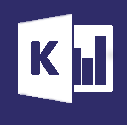

TraitError: The 'version' trait of a KqlMagic instance must be a unicode string, but a value of True <class 'bool'> was specified.

In [3]:
# %pushd C:\My Projects\KqlMagic\src
!pip install git+git://github.com/mbnshtck/jupyter-kql-magic.git
%reload_ext kql
# %popd

In [ ]:
%kql kusto://code().cluster('help').database('Samples')

In [ ]:
import sys
!{sys.executable} --version

In [ ]:
print(__main__)

In [ ]:
%kql PageViews | summarize count() by Language | sort by count_ | limit 10 | render piechart

### Show KqlMagic docstring 

In [ ]:
%kql?

### List again current defined Magics
*%kql and %%kql should be listed*

In [ ]:
%lsmagic

### List all KqlMagic configurable options

In [ ]:
%config KqlMagic

### Configure KqlMagic DSN filename
*Example how to configure KqlMagic properties*  
*when dsn_filename is set, KqlMagic can be instructed to get a section as a connection string*

In [ ]:
%config KqlMagic.dsn_filename = 'dsn/odbc.ini'

### Print content of dsn/odbc.ini file

In [ ]:
%pycat dsn/odbc.ini

### Get connection string to Kusto cluster from a section
*Example how to get the connection string from a section*
*to make it work, KqlMagic.dsn_filename must be set, and a section with connection string attributes must exist in the file *

In [ ]:
%kql [KUSTO-DSN] -df dsn/odbc.ini -!vc

### Show environment variables

In [ ]:
%env

### Get connection string to Kusto cluster from an environment variable
*Example how to get the connection string from an environment parameter*  
*to make it work, the environment variable must be set to a connection string*

In [ ]:
%kql $HELP_CONNECTION_STR

### List current connections
note that current connection is prefixed by a '*'

In [ ]:
%kql

### Create connection to Kusto database, on the same cluster as current connection cluster

In [ ]:
%kql kusto://database('Other')

### Make specific connection current

In [ ]:
%kql Samples@help



### Kql query
note: when connection is not specified, all connection are displayed, and current connection is prefixed with an '*'  
note: metadata is displayed too, that includes the elapsed time of the query, and how many records returned

In [ ]:
%kql PageViews | summarize count() by Language | sort by count_ | limit 10 | render piechart

In [ ]:
%kql appinsights://appid('DEMO_APP').appkey('DEMO_KEY')

In [ ]:
%%kql DEMO_APP@appinsights requests 
 | where timestamp > ago(24h) and success=="False"
 | join kind=inner (exceptions 
 | where timestamp > ago(24h) ) on operation_Id 
 | project type, method, requestName = name, requestDuration = duration | render columnchart

In [ ]:
%kql requests | count

In [ ]:
int('a')

### Notebook last result

In [ ]:
from IPython.core.display import display, HTML
HTML??

In [ ]:
_

### last kqlMagic result
_kql_raw_result_ holds last kql magic result

In [ ]:
_kql_raw_result_.Chart()

In [ ]:
_kql_raw_result_.ChartFS()

In [ ]:
_

### Two %kql (line magic) in same cell
note: only last query is displayed

In [ ]:
%kql PageViews | summarize count() by Language | sort by count_ | limit 10
%kql Samples@help PageViews | summarize count() by Language | sort by count_ | limit 5

### Kql results may be assigned
note: when queryresults are assigned display is automatically suppressed for that query  
note: assignment must be placed after connection if connection is specified

In [ ]:
%kql Samples@help q2 << PageViews | summarize count() by Language | sort by count_ | limit 3

In [ ]:
q2

In [ ]:
%kql q1 << PageViews | summarize count() by Language | sort by count_ | limit 10
%kql Samples@help q2 << PageViews | summarize count() by Language | sort by count_ | limit 5

In [ ]:
q1

In [ ]:
q2

### Two kql query in a %%kql cell magic
note: the query must be separated by an empty line
note that the output is suppressed !!! It is becasue the cell ends with a semicolon  ;

In [ ]:
%%kql Samples@help
p1 << PageViews | summarize count() by Language | sort by count_ | limit 10 | render piechart

PageViews | summarize count() by Language | sort by count_ | limit 10  | render barchart

In [ ]:
p1

In [ ]:
_kql_raw_result_.Chart()

In [ ]:
%%kql -tp pandas
StormEvents
| extend hour= floor( StartTime % 1d , 1h)/ 1h
| where State in ("GULF OF MEXICO","MAINE","VIRGINIA","WISCONSIN","NORTH DAKOTA","NEW JERSEY","OREGON")
| summarize event_count=count() by hour, State
| extend cs2 = event_count*2 
| extend cs3 = event_count*3 
| extend ss = strcat(State,'_s')
| extend sh = strcat(substring(tostring(toint(100+hour)), 1), '-', State)
| sort by sh
| project sh, event_count, cs2, cs3
//| limit 10
//| render barchart 

In [ ]:
_kql_raw_result_.flags

In [ ]:
_kql_raw_result_.Table(table_package='prettytable')

In [ ]:
_kql_raw_result_.flags

In [ ]:
_

In [ ]:
_.Table()

In [ ]:
%kql Samples@help PageViews | summarize count() by Language | sort by count_ | limit 10 | render columnchart

In [ ]:
_kql_raw_result_

### Display results in a table format

In [ ]:
_kql_raw_result_.Table(fullscreen=True, table_package='pandas')

In [ ]:
_kql_raw_result_.TableFS(fullscreen=False, table_package='pandas')

In [ ]:
_kql_raw_result_.query

### Submit a new kql query that is exactly as this query

In [ ]:
_kql_raw_result_.Submit()

### Refresh this query (modifies current object)

In [ ]:
_kql_raw_result_.Refresh()

### Display the chart od the query, if it was rendered to a chart

In [ ]:
_kql_raw_result_.Chart()

In [ ]:
_kql_raw_result_.ChartFS()

### Get the dataframe of the raw result

In [ ]:
_kql_raw_result_.Dataframe()

### Config  Kql magic to return instead of a raw object to return a dataframe 

In [ ]:
%config KqlMagic.autopandas = True

In [ ]:
%%kql
PageViews | summarize count() by Language | sort by count_ | limit 5

x << PageViews | summarize count() by Language | sort by count_ | limit 11

In [ ]:
x

In [ ]:
_

In [ ]:
_kql_raw_result_.query

In [ ]:
_kql_raw_result_.connection

In [ ]:
_kql_raw_result_.start_time

In [ ]:
_kql_raw_result_.end_time

In [ ]:
_kql_raw_result_.flags

In [ ]:
_kql_raw_result_.elapsed_timespan

In [ ]:
y = _kql_raw_result_.Dataframe()

In [ ]:
y

In [ ]:
%config KqlMagic.autopandas = False

In [ ]:
%%kql Samples@help
x << PageViews 
| summarize count() by Language  // bbbb
| sort by count_ 
// bbb
| limit 10  
| render piechart
;;

;

In [ ]:
x

In [ ]:
x.Table()

In [ ]:
x.Chart()

In [ ]:
x.Dataframe()

In [ ]:
x

In [ ]:
?kql

In [ ]:
??kql

In [ ]:
%config InlineBackend.figure_format = 'retina'
x.Chart();

In [ ]:
%%kql 
PageViews | summarize count() by Language | sort by count_ | limit 5;
// # _ = _kql_raw_result_;
// #_.pie()

In [ ]:
_

In [ ]:
y = _[1][0]
y

# Kql - render barchart

In [ ]:
%%kql 
PageViews 
| summarize count() by Language 
| sort by count_ 
| limit 10
| extend cs = 2 * count_
| render barchart title="Michael's chart"

In [ ]:
_

In [ ]:
%kql y << PageViews | summarize count() by Language | sort by count_ | limit 10 | extend cs = 2 * count_ | render barchart  title="Michael's chart";
%kql PageViews | summarize count() by Language | sort by count_ | limit 10 | extend cs = 2 * count_ | render columnchart title="Michael's chart";

In [ ]:
_

In [ ]:
y

# Kql - render columnchart

In [ ]:
%%kql Samples@help
PageViews 
| summarize count() by Language 
| sort by count_ 
| limit 10 
| extend cs = 2 * count_
| extend cs3 = 0.6 * count_
//| extend cs4 = 0.6 * count_
//| extend cs5 = 0.6 * count_
//| extend cs6 = 0.6 * count_
//| extend cs7 = 0.6 * count_
//| extend cs8 = 0.6 * count_
//| extend cs9 = 0.6 * count_
//| extend cs10 = 0.6 * count_
//| extend cs11 = 0.6 * count_
//| extend cs12 = 0.6 * count_
//| extend cs13 = 0.6 * count_
//| extend cs14 = 0.6 * count_
//| extend cs15 = 0.6 * count_
| render columnchart title="Michael's chart"


In [ ]:
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
plotly.offline.init_notebook_mode(connected=True)

fig = {
    'data': [
        {
            'labels': ['1st', '2nd', '3rd', '4th', '5th'],
            'values': [38, 27, 18, 10, 7],
            'type': 'pie',
            'name': 'Starry Night',
            'marker': {'colors': ['rgb(56, 75, 126)',
                                  'rgb(18, 36, 37)',
                                  'rgb(34, 53, 101)',
                                  'rgb(36, 55, 57)',
                                  'rgb(6, 4, 4)']},
            'domain': {'x': [0, .48],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': ['1st', '2nd', '3rd', '4th', '5th'],
            'values': [28, 26, 21, 15, 10],
            'marker': {'colors': ['rgb(177, 127, 38)',
                                  'rgb(205, 152, 36)',
                                  'rgb(99, 79, 37)',
                                  'rgb(129, 180, 179)',
                                  'rgb(124, 103, 37)']},
            'type': 'pie',
            'name': 'Sunflowers',
            'domain': {'x': [.52, 1],
                       'y': [0, .49]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'

        },
        {
            'labels': ['1st', '2nd', '3rd', '4th', '5th'],
            'values': [38, 19, 16, 14, 13],
            'marker': {'colors': ['rgb(33, 75, 99)',
                                  'rgb(79, 129, 102)',
                                  'rgb(151, 179, 100)',
                                  'rgb(175, 49, 35)',
                                  'rgb(36, 73, 147)']},
            'type': 'pie',
            'name': 'Irises',
            'domain': {'x': [0, .48],
                       'y': [.51, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        },
        {
            'labels': ['1st', '2nd', '3rd', '4th', '5th'],
            'values': [31, 24, 19, 18, 8],
            'marker': {'colors': ['rgb(146, 123, 21)',
                                  'rgb(177, 180, 34)',
                                  'rgb(206, 206, 40)',
                                  'rgb(175, 51, 21)',
                                  'rgb(35, 36, 21)']},
            'type': 'pie',
            'name':'The Night Café',
            'domain': {'x': [.52, 1],
                       'y': [.51, 1]},
            'hoverinfo':'label+percent+name',
            'textinfo':'none'
        }
    ],
    'layout': {'title': 'Van Gogh: 5 Most Prominent Colors Shown Proportionally',
               'showlegend': False}
}

plotly.offline.iplot(fig, filename='pie_chart_subplots')

In [ ]:
_.Table()

In [ ]:
%config 

# Kql - render linechart

In [ ]:
%config KqlMagic.autopandas = False

In [ ]:
%%kql 
PageViews 
| summarize count() by Language 
| limit 10
| extend cs2 = 2 * count_
| extend cs3 = 3 * count_
| render linechart title="Michael's chart"

In [ ]:
_kql_raw_result_

In [ ]:
_kql_raw_result_.Dataframe()._repr_html_()

In [ ]:
_kql_raw_result_.Table()

In [ ]:
_kql_raw_result_.Dataframe()

In [ ]:
%%kql 
v << PageViews 
| summarize count() by Language 
//| sort by count_ 
| limit 10
| extend cs2 = 2 * count_
| extend cs3 = 3 * count_
//| extend cs4 = 4 * count_
//| extend cs5 = count_ * count_
| render linechart title="Michael's chart"
| render piechart title="Michael's chart"
| render barchart title="Michael's chart"

In [ ]:
v.Chart()

In [ ]:
%%kql 
PageViews | summarize count() by Language | limit 10 | extend cs2 = 2 * count_ | extend cs3 = 3 * count_ | render linechart title="Michael's chart"


# Kql - render areachart

In [ ]:
%%kql 
PageViews 
| summarize count() by Language 
//| sort by count_ 
| limit 10
| extend cs5 = 5 * count_
| extend cs4 = 4 * count_
| extend cs3 = 3 * count_
| extend cs2 = 2 * count_
| render areachart title="Michael's chart"

In [ ]:
_

In [ ]:
_.Table()

# Kql - render scatterchart

In [ ]:
%%kql 
PageViews 
| summarize count() by Language 
//| sort by count_ 
| limit 10
| extend cs5 = count_ * 5
| extend cs4 = count_ * 4
| extend cs3 = count_ * 3
| extend cs2 = count_ * 2
| render scatterchart title="Michael's chart"

In [ ]:
_kql_raw_result_

In [ ]:
_.Table()

# Kql - render scatterchart

In [ ]:
%%kql 
z << let randn = () {rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand() + rand()};
range c from 1 to 1000 step 1 
| limit 1000
| extend e1 = randn()
| extend e2 = randn()
| extend e3 = randn()
| extend e4 = randn()
| extend e5 = randn()
| project e1,e2,e3,e4,e5
| render scatterchart title="Michael's chart"

In [ ]:
z

In [ ]:
z.Table()

# Kql - render stackedareachart

In [ ]:
%%kql 
let randn = () {rand() + rand() + rand()};
range columnName from datetime('2016-01-01') to datetime('2016-03-31') step 1d
| extend e1 = randn()
| extend e2 = randn()
| extend e3 = randn()
| extend e4 = randn()
| render stackedareachart title="Michael's chart"

In [ ]:
%%kql 
let randn = () {rand() + rand() + rand()};
range columnName from datetime('2016-01-01') to datetime('2016-03-31') step 1d
| extend e1 = randn()
| extend e2 = randn()
| extend e3 = randn()
| extend e4 = randn()
| render stackedareachart title="Michael's chart"

# Kql - render timechart

In [ ]:
%%kql 
let randn = () {rand() + rand() + rand()};
range columnName from datetime('2015-01-01') to datetime('2016-01-10') step 1d
| extend e1 = randn()
| extend e2 = randn()
| extend e3 = randn()
| extend e4 = randn()
| render timechart title="Michael's chart"

# Kql - render linechar

In [ ]:
%%kql 
let randn = () {rand() + rand() + rand()};
range columnName from datetime('2015-01-01') to datetime('2016-01-10') step 1d
| extend e0 = randn()
| extend e1 = randn()
| extend e2 = randn()
| extend e3 = randn()
| extend e4 = randn()
| project e0,e1,e2,e3,e4
| render linechart title="Michael's chart"

# Kql - render anomalychart

In [ ]:
%%kql 
let randn = () {rand() + rand() + rand()};
range columnName from datetime('2015-01-01') to datetime('2016-01-10') step 1d
| extend e1 = randn()
| extend e2 = randn()
| extend e3 = randn()
| extend e4 = randn()
| render anomalychart title="Michael's chart"

In [ ]:
name = input("what is your name: ")
print("name: ", name)
name = input("what is your name: ")
print("name: ", name)
name = input("what is your name: ")
print("name: ", name)

In [ ]:
import getpass
getpass.getpass??
#p = getpass.getpass()

In [ ]:
print(p)


In [ ]:
import ipywidgets as widgets
from IPython.display import display
x = 12
w = widgets.IntSlider(x)
display(w)

In [ ]:
display(w)
display(w)
display(w)


In [ ]:
w.value

In [ ]:
p = getpass.getpass(prompt='pw: ')
p = getpass.getpass(prompt='pw1: ')
p = getpass.getpass(prompt='pw   : 11 ')


In [ ]:
%pushd
%cd C:\My Projects\KqlMagic\src
%load_ext kql
%popd

In [ ]:
%pushd
%cd C:\My Projects\KqlMagic\src
%reload_ext kql
%popd

In [ ]:
%kql appinsights://appid('<DEMO1_APP>').appkey('<DEMO_KEY>')

In [ ]:
%kql kusto://

In [ ]:
%kql appinsights://

In [ ]:
%%kql 
let randn = () {rand() + rand() + rand()};
range columnName from datetime('2015-01-01') to datetime('2016-01-10') step 1d
| extend e1 = randn()
| extend e2 = randn()
| extend e3 = randn()
| extend e4 = randn()
| render anomalychart title="Michael's chart"

In [ ]:
import plotly
import plotly.plotly as py
import plotly.figure_factory as ff

df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/school_earnings.csv")

table = ff.create_table(df)
plotly.offline.iplot(table, filename='jupyter/table1')